## Assignment: Feature Engineering 1 Module 16, checkpoint 7 - Jaz Viccarro

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings


from scipy.stats import boxcox
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale

%matplotlib inline

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from studentsperformance',con=engine)

engine.dispose()


#### 1. Are the exam score variables distributed normally? If not, apply Box-Cox transformation. Does anything change?¶


In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


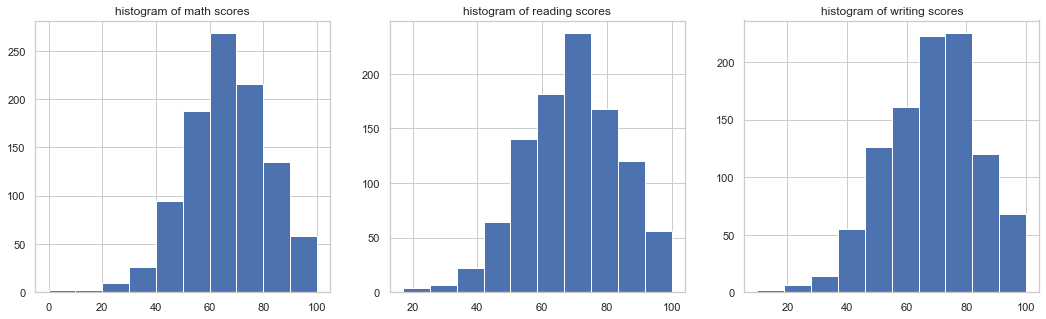

In [12]:
math= df['math score']  
reading = df['reading score']
writing = df['writing score']

plt.figure(figsize=(18,5))

# histograms of the untransformed data
plt.subplot(1, 3, 1)
plt.hist(math)
plt.title("histogram of math scores")

plt.subplot(1, 3, 2)
plt.hist(reading)
plt.title("histogram of reading scores")

plt.subplot(1, 3, 3)
plt.hist(writing)
plt.title("histogram of writing scores")

plt.show()


> **Answer:  The distributions of the scores don't appear to be normal in the non-transformed data, especially evident in the Writing Scores.**

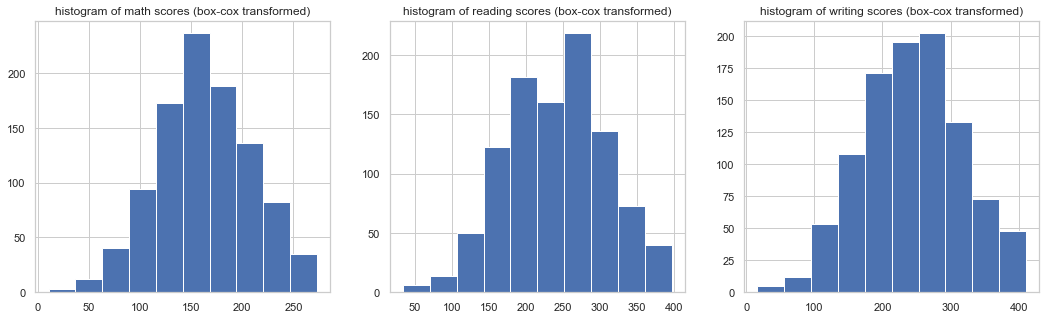

In [11]:
df['math score'].min() # 0
df['reading score'].min() #17
df['writing score'].min() #10
boxcox_math,_ = boxcox(df[df['math score'] > 0]['math score']) #filter for all observations where boxcox will work
boxcox_reading,_ = boxcox(df['reading score'])
boxcox_writing,_ = boxcox(df['writing score'])

plt.figure(figsize=(18,5))

# histograms of the box-cox transformed data
plt.subplot(1, 3, 1)
plt.hist(boxcox_math)
plt.title("histogram of math scores (box-cox transformed)")

plt.subplot(1, 3, 2)
plt.hist(boxcox_reading)
plt.title("histogram of reading scores (box-cox transformed)")

plt.subplot(1, 3, 3)
plt.hist(boxcox_writing)
plt.title("histogram of writing scores (box-cox transformed)")

plt.show()

> **Answer:  The distributions of the scores after applying the Boxcox Transformation appear more normal than the untransformed data.**

### Here, we further verifying normality vs. non-normality using Scipy's Jacques-Bera and Normal tests and using Numpy's log-transformation onthe data for each score set:

In [24]:
math = df[df['math score'] > 0]['math score']
reading = df['reading score']
writing = df['writing score']

jb_stats = jarque_bera(np.log(math))
norm_stats = normaltest(np.log(math))

print("Jarque-Bera test statistics for the math scores set is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for the math scores is {0} and p value is {1}\n".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(np.log(reading))
norm_stats = normaltest(np.log(reading))

print("Jarque-Bera test statistics for the reading scores is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for the reading scores is {0} and p value is {1}\n".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(np.log(writing))
norm_stats = normaltest(np.log(writing))

print("Jarque-Bera test statistics for the writing scores is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for the writing scores is {0} and p value is {1}\n".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics for the math scores set is 1733.5739738520158 and p value is 0.0
Normality test statistics for the math scores is 335.09113813231846 and p value is 1.7214082785301018e-73

Jarque-Bera test statistics for the reading scores is 495.1273179446674 and p value is 0.0
Normality test statistics for the reading scores is 209.7715093472919 and p value is 2.8099300901335873e-46

Jarque-Bera test statistics for the writing scores is 1410.937006925743 and p value is 0.0
Normality test statistics for the writing scores is 318.9692123027676 and p value is 5.454005856377552e-70



#### >Now, let's test the data on the Boxcox transformed values to see how it affects our significance level:

In [23]:
boxcox_math,_ = boxcox(df[df['math score'] > 0]['math score']) #filter for all observations where boxcox will work
boxcox_reading,_ = boxcox(df['reading score'])
boxcox_writing,_ = boxcox(df['writing score'])

jb_stats = jarque_bera(boxcox_math)
norm_stats = normaltest(boxcox_math)

print("Jarque-Bera test statistics for the boxcox transformed math scores set is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for the boxcox transformed math scores is {0} and p value is {1}\n".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(boxcox_reading)
norm_stats = normaltest(boxcox_reading)

print("Jarque-Bera test statistics for the boxcox transformed reading scores is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for the boxcox transformed reading scores is {0} and p value is {1}\n".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(boxcox_writing)
norm_stats = normaltest(boxcox_writing)

print("Jarque-Bera test statistics for the boxcox transformed writing scores is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for the boxcox transformed writing scores is {0} and p value is {1}\n".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics for the boxcox transformed math scores set is 1.720098104874378 and p value is 0.4231413256953709
Normality test statistics for the boxcox transformed math scores is 1.8323073377495822 and p value is 0.40005482895717037

Jarque-Bera test statistics for the boxcox transformed reading scores is 4.119778575331906 and p value is 0.1274680814024559
Normality test statistics for the boxcox transformed reading scores is 5.282274611852865 and p value is 0.07128015609575467

Jarque-Bera test statistics for the boxcox transformed writing scores is 4.746478090040098 and p value is 0.09317842784055597
Normality test statistics for the boxcox transformed writing scores is 6.267311355043339 and p value is 0.04355827085023795



**>As our tests indicate above, we've created more normal distribution using the Boxcox transformation.**
_______________________

#### 2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox Transformation  and check whether or not the transformed variable is normally distributed.

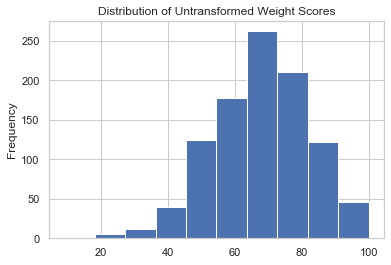

In [30]:
math= df['math score']  
reading = df['reading score']
writing = df['writing score']

weighted_scores = ((math + reading + writing)/3)

weighted_scores.plot(kind='hist')
plt.title("Distribution of Untransformed Weight Scores")
plt.show()


#### >Answer:  Here we made a new variable with weight averages.  Our histogram above shows a non-normal distribution. We will use a Jacques-Bera and Normal test to confirm the significance level:

In [29]:
jb_stats = jarque_bera(weighted_scores)
norm_stats = normaltest(weighted_scores)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 15.453387913085168 and p value is 0.00044089934264401887
Normality test statistics is 15.186721327231322 and p value is 0.0005037851534494478


#### >As we can see using the p values that are less than 0.05, these distributions are non-normal.

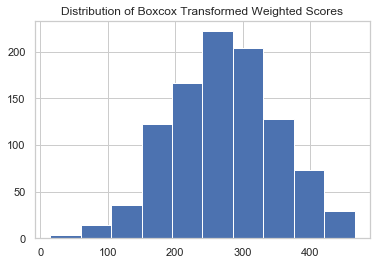

Jarque-Bera test statistics for the Boxcox Transformed Weighted Scores is 2.4353987431906026 and p value is 0.29591016374203183
Normality test statistics for the BoxCox Transformed Weighted Scores is 2.779857245981238 and p value is 0.2490930835165177


In [36]:
boxcox_weighted,_ = boxcox(weighted_scores)

plt.hist(boxcox_weighted)
plt.title('Distribution of Boxcox Transformed Weighted Scores')
plt.show()

jb_stats = jarque_bera(boxcox_weighted)
norm_stats = normaltest(boxcox_weighted)

print("Jarque-Bera test statistics for the Boxcox Transformed Weighted Scores is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for the BoxCox Transformed Weighted Scores is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

#### >After applying the Boxcox transformation to the Weight Scores, we see a normal distribution verified by our p-value greater than 0.05.

#### 3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

In [39]:
df['weighted_scores'] = weighted_scores.round(0).astype('int')

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,weighted_scores
0,female,group B,bachelor's degree,standard,none,72,72,74,73
1,female,group C,some college,standard,completed,69,90,88,82
2,female,group B,master's degree,standard,none,90,95,93,93
3,male,group A,associate's degree,free/reduced,none,47,57,44,49
4,male,group C,some college,standard,none,76,78,75,76


<Figure size 2736x2880 with 0 Axes>

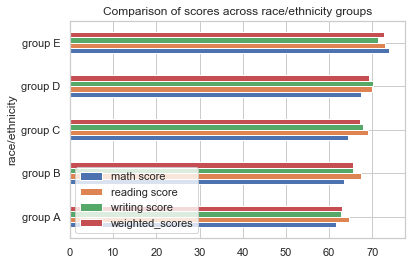

<Figure size 2736x2880 with 0 Axes>

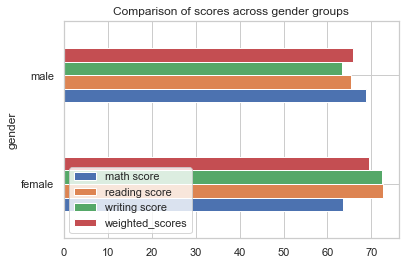

<Figure size 2736x2880 with 0 Axes>

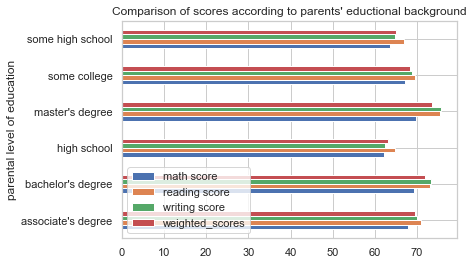

<Figure size 2736x2880 with 0 Axes>

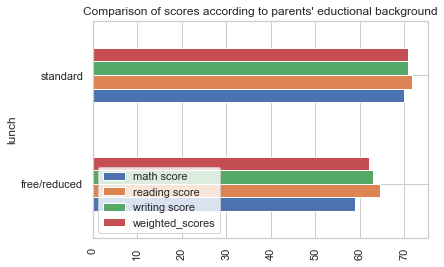

<Figure size 2736x2880 with 0 Axes>

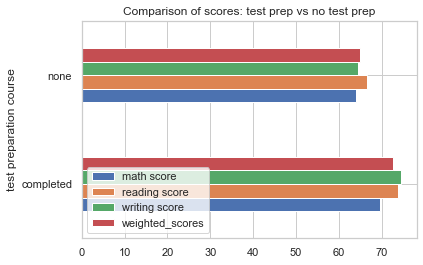

In [68]:
table_race = df.groupby('race/ethnicity').mean()[['math score', 'reading score', 'writing score', 'weighted_scores']].round(2)
table_gender = df.groupby('gender').mean()[['math score', 'reading score', 'writing score', 'weighted_scores']].round(2)
table_parents = df.groupby('parental level of education').mean()[['math score', 'reading score', 'writing score', 'weighted_scores']].round(2)
table_lunch = df.groupby('lunch').mean()[['math score', 'reading score', 'writing score', 'weighted_scores']].round(2)
table_testp = df.groupby('test preparation course').mean()[['math score', 'reading score', 'writing score', 'weighted_scores']].round(2)

plt.figure(figsize=(38, 40))

table_race.plot(kind='barh')
plt.title("Comparison of scores across race/ethnicity groups")
plt.xticks(rotation="horizontal")
plt.legend(loc='lower left')
plt.show()

plt.figure(figsize=(38, 40))

table_gender.plot(kind='barh')
plt.title("Comparison of scores across gender groups")
plt.xticks(rotation="horizontal")
plt.legend(loc='lower left')
plt.show()

plt.figure(figsize=(38, 40))

table_parents.plot(kind='barh')
plt.title("Comparison of scores according to parents' eductional background")
plt.xticks(rotation="horizontal")
plt.legend(loc='lower left')
plt.show()

plt.figure(figsize=(38, 40))
table_lunch.plot(kind='barh')
plt.title("Comparison of scores according to parents' eductional background")
plt.xticks(rotation="vertical")
plt.legend(loc='lower left')
plt.show()

plt.figure(figsize=(38, 40))
table_testp.plot(kind='barh')
plt.title("Comparison of scores: test prep vs no test prep")
plt.xticks(rotation="horizontal")
plt.legend(loc='lower left')
plt.show()

#### >Answer: 
 - In chart 1, where we see scores compared by race, we can see Group E is the highest performer in our target variable.
 - In chart 2, comparing scores by gender, Females outperform Males when using our target variable as the decider.
 - In chart 3, comparing scores by level of parental education, our target variable is most affected by those whose parents have obtained a Master's degree.
 - In chart 4, comparing scores by whether a student has subsidized lunch or standard lunch, those with standard lunch most affect our target variable.
 - In chart 5, comparing scores by whether a student has completed a test preparation course, our target variable is most affected by those who have completed a preparation course. 

- While these features all seem useful, if I were to build a model, I would use all but the lunch standard as it is unclear which facet of this feature affects scores.